<a href="https://colab.research.google.com/github/Niss0205/AgriEdge/blob/main/GeoSpatialAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install earthpy gdal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 1.0 MB 45.5 MB/s 
     |████████████████████████████████| 19.3 MB 408 kB/s 
     |████████████████████████████████| 16.7 MB 41.1 MB/s 
     |████████████████████████████████| 6.3 MB 35.2 MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [4]:
S_sentinel_bands = glob("/content/drive/MyDrive/ump6/Data/Images Satellitaires/ID0/*.tif")
S_sentinel_bands.sort()
S_sentinel_bands

['/content/drive/MyDrive/ump6/Data/Images Satellitaires/ID0/image_20160614.tif',
 '/content/drive/MyDrive/ump6/Data/Images Satellitaires/ID0/image_20160630.tif',
 '/content/drive/MyDrive/ump6/Data/Images Satellitaires/ID0/image_20170601.tif',
 '/content/drive/MyDrive/ump6/Data/Images Satellitaires/ID0/image_20170617.tif',
 '/content/drive/MyDrive/ump6/Data/Images Satellitaires/ID0/image_20170624.tif',
 '/content/drive/MyDrive/ump6/Data/Images Satellitaires/ID0/image_20180604.tif',
 '/content/drive/MyDrive/ump6/Data/Images Satellitaires/ID0/image_20180620.tif',
 '/content/drive/MyDrive/ump6/Data/Images Satellitaires/ID0/image_20190607.tif',
 '/content/drive/MyDrive/ump6/Data/Images Satellitaires/ID0/image_20190623.tif',
 '/content/drive/MyDrive/ump6/Data/Images Satellitaires/ID0/image_20200609.tif',
 '/content/drive/MyDrive/ump6/Data/Images Satellitaires/ID0/image_20200625.tif',
 '/content/drive/MyDrive/ump6/Data/Images Satellitaires/ID0/image_20210612.tif',
 '/content/drive/MyDrive/ump

In [5]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))


/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [6]:
arr_st = np.stack(l)

In [7]:
print(f'Height: {arr_st.shape[1]}\nWidth: {arr_st.shape[2]}\nBands: {arr_st.shape[0]}')

Height: 29
Width: 30
Bands: 13


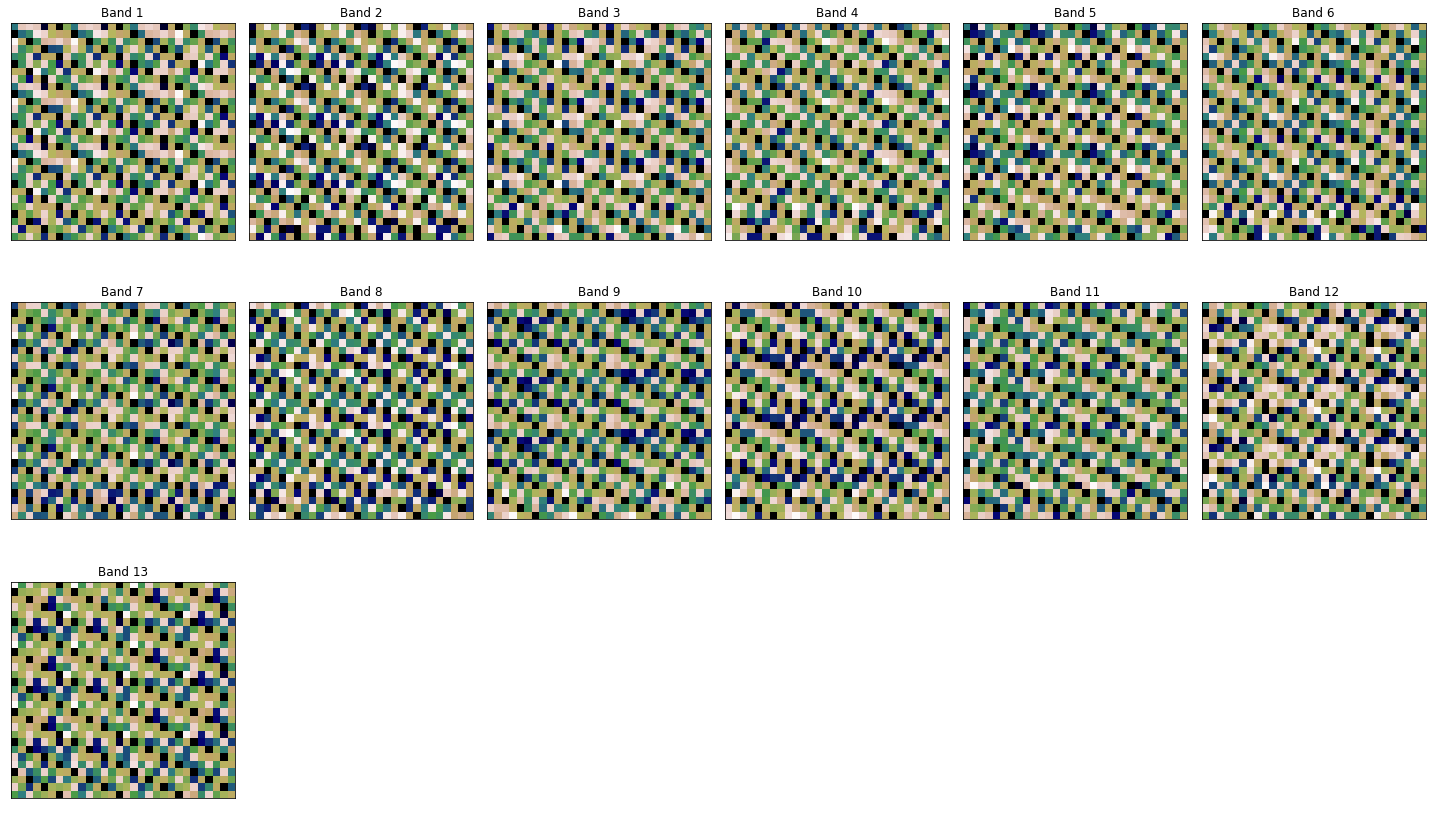

In [8]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

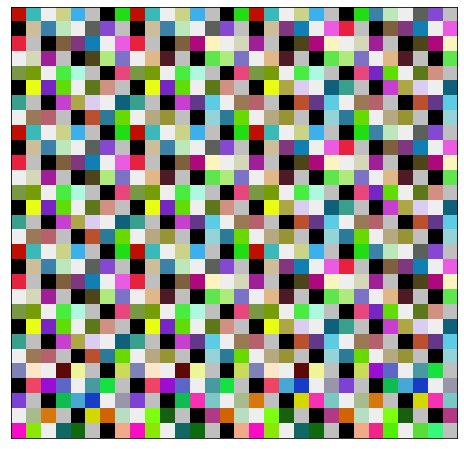

In [9]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(8, 10), 
                  # title='RGB Composite Image'
                  )

plt.show()

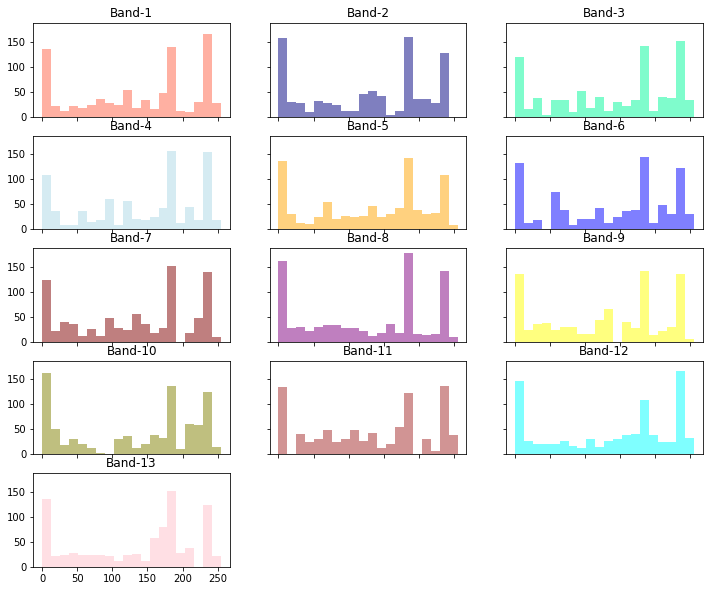

In [12]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan','pink']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 14)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


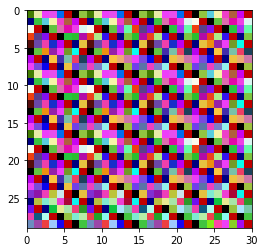

In [13]:
import rasterio
from rasterio.plot import show
fp = '/content/drive/MyDrive/ump6/Data/Images Satellitaires/ID0/image_20160614.tif'
img = rasterio.open(fp)
show(img)

In [14]:
#Preprocessing
x = np.moveaxis(arr_st, 0, -1)
x.shape

(29, 30, 13)

/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


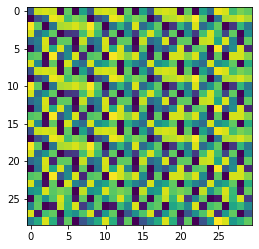

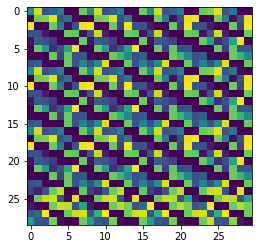

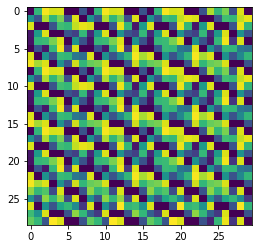

In [24]:
import rasterio
from rasterio.plot import show
fp = '/content/drive/MyDrive/ump6/Data/Images Satellitaires/ID0/image_20160614.tif'
img1 = rasterio.open(fp)
#show(img)
show(img1.read(1))
show(img1.read(2))
show(img1.read(3))